In [1]:
suppressMessages(library(edgeR))
library(limma)
library(ClusterR)
library(Rtsne)
library(umap)
library(ggplot2)

In [2]:
ann_count_table <- read.table("/sharedFolder/dataset/annotated_count_table.tsv", sep="\t", header = TRUE, row.names=1)
cpm_mat <- cpm(ann_count_table)
log2_cpm_mat1 = log2(cpm_mat + 1)

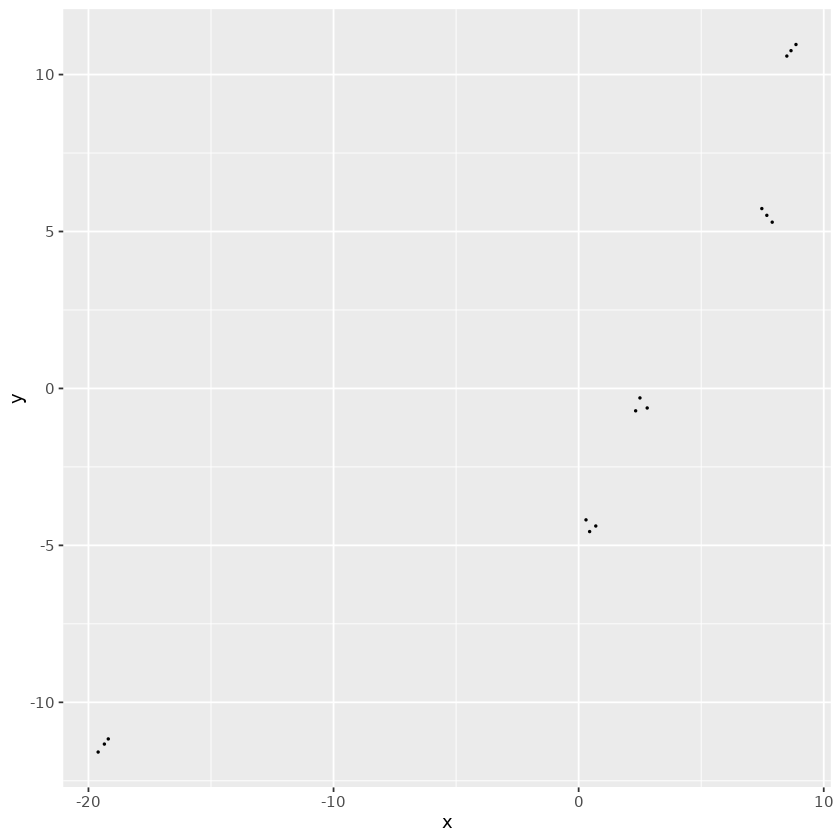

In [18]:
umap.out <- umap(t(log2_cpm_mat1), n_epochs = 1000, min_dist = 0.01, n_neighbors = 4) 
f=data.frame(x=as.numeric(umap.out$layout[,1]), y=as.numeric(umap.out$layout[,2]))
sp <- ggplot(f, aes(x=x, y=y)) + geom_point(pch = 19, cex = 3)
sp

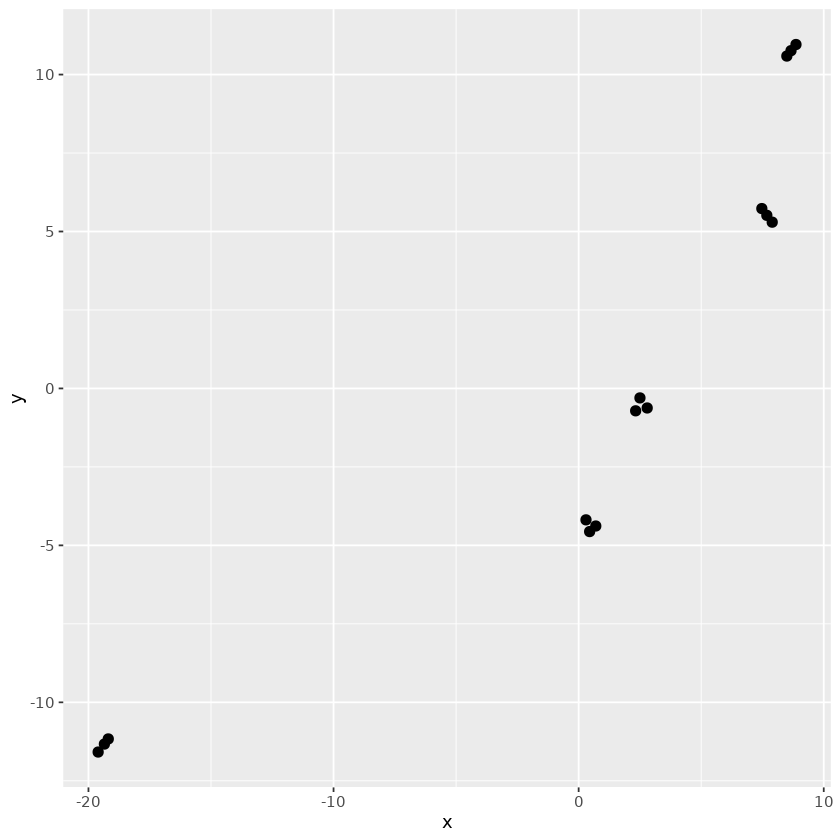

In [94]:
sp <- ggplot(f, aes(x=x, y=y)) + geom_point(pch = 19, cex = 2.5)
sp

In [4]:
save(f, file="/sharedFolder/variables/f.rda")

In [95]:
km <- KMeans_arma(f, clusters = 5, n_iter = 50, seed_mode = "random_subset", verbose = T)
pr <- predict_KMeans(f, km)

kmeans(): generating initial means
kmeans(): n_threads: 1
kmeans(): iteration:    1   delta: 3.25611
kmeans(): iteration:    2   delta: 0.231158
kmeans(): iteration:    3   delta: 0


In [96]:
pr <- as.factor(pr)
pr

[1] 5 5 5 3 3 3 5 5 5 2 4 2 1 1 1
Levels: 1 2 3 4 5

In [70]:
class(km) <- "matrix"

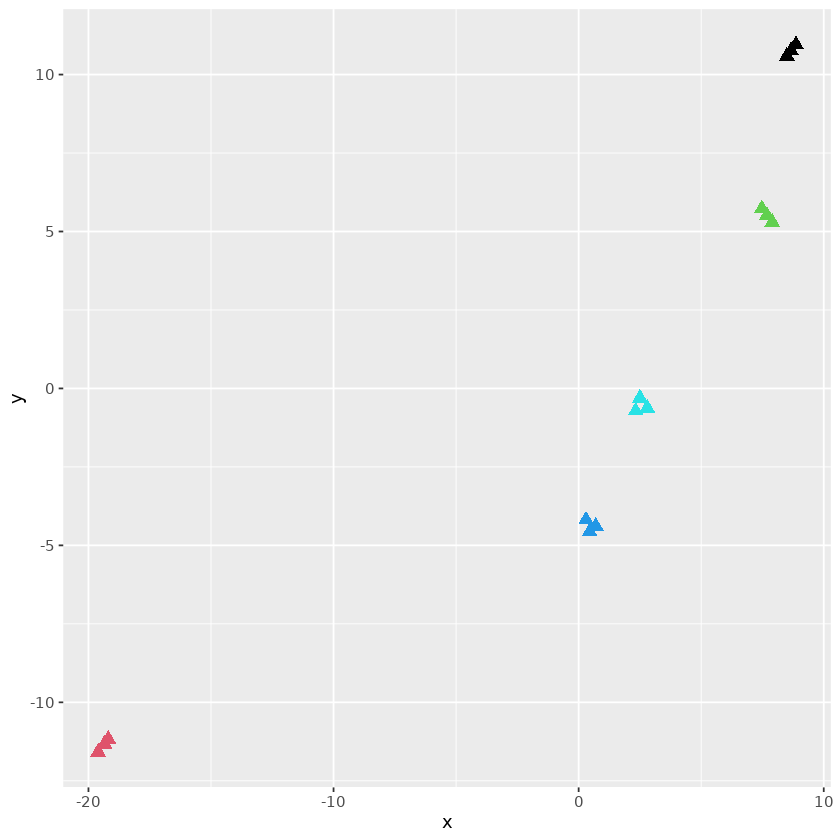

In [72]:
sp <- ggplot(f, aes(x=x,y=y)) + geom_point(pch=17, cex=3, color=pr)
sp

In [73]:
# str(umap.out)

In [75]:
annotated_count_table <- read.table("/sharedFolder/dataset/annotated_count_table.tsv", sep="\t", row.names=1, header=T)

In [76]:
rownames(f) <- names(annotated_count_table)

In [77]:
rownames(f) <- paste(rownames(f), as.character(pr), sep=":")

In [78]:
names(ann_count_table) <- rownames(f)

In [79]:
ann_count_table <- as.data.frame(ann_count_table)

Spent two incredible hours debugging the fact that apply won't work on the single column.

In [80]:
# cls4 <- ann_count_table[,11]
# names(cls4) <- rownames(ann_count_table)
cls1 <- apply(ann_count_table[,grep(":1$", colnames(ann_count_table))], 1, sum)
cls2 <- apply(ann_count_table[,grep(":2$", colnames(ann_count_table))], 1, sum)
cls3 <- apply(ann_count_table[,grep(":3$", colnames(ann_count_table))], 1, sum)
cls4 <- apply(ann_count_table[,grep(":4$", colnames(ann_count_table))], 1, sum)
cls5 <- apply(ann_count_table[,grep(":5$", colnames(ann_count_table))], 1, sum)

In [81]:
cls <- data.frame(cls1, cls2, cls3, cls4, cls5)

In [82]:
col_sum <- apply(cls, 2, sum)

In [83]:
cls_rank <- t(cls)/col_sum
cls_rank <- as.data.frame(t(cls_rank) * 1000000)
cls_rank_log <- log2(cls_rank + 1)

In [84]:
cls_rank_log_mean <- apply(cls_rank_log, 1, mean)
cls_rank_log_normalised <- cls_rank_log - cls_rank_log_mean

In [85]:
log2_cpm_mat_mean <- apply(log2_cpm_mat1, 1, mean)
log2_cpm_mat_normalised <- log2_cpm_mat1 - log2_cpm_mat_mean

In [86]:
cls_mat_n <- data.frame(log2_cpm_mat_normalised, cls_rank_log_normalised)

In [89]:
# save(cls_mat_n, file="/sharedFolder/variables/cluster_matrix.rda")

In [90]:
set.seed(111)
cls_mat_n <- as.data.frame(scale(t(cls_mat_n)))
dist_mat <- dist(cls_mat_n, method = "euclidean")
hclust_avg <- hclust(dist_mat, method = "average")

pdf("cluster2static_subset.pdf")
plot(hclust_avg)
dev.off()


png 
  2